# Final

# Regression: Predicting the global land temperature of the Earth in 2050 from the past data via the maximum likelihood approach

In [2]:
ls

Final copy.ipynb           usaTemperatureHistory.txt
Final.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
data=pd.read_csv('usaTemperatureHistory.txt', sep='\t')

In [5]:
data

,Year,Month,Anomaly,Unc.,Anomaly.1,Unc..1,Anomaly.2,Unc..2,Anomaly.3,Unc..3,Anomaly.4,Unc..4
0,1743,11,-1.131,2.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2013,5,0.813,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3235,2013,6,1.088,0.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3236,2013,7,0.671,0.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237,2013,8,0.919,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

# Following instructions for 'Date'
data['Date'] = data['Year'] + data['Month'] - (1/12)  

<function matplotlib.pyplot.show(*args, **kw)>

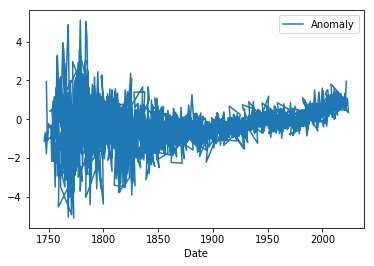

In [7]:
data.plot(x='Date', y='Anomaly')
plt.show

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<function matplotlib.pyplot.show(*args, **kw)>

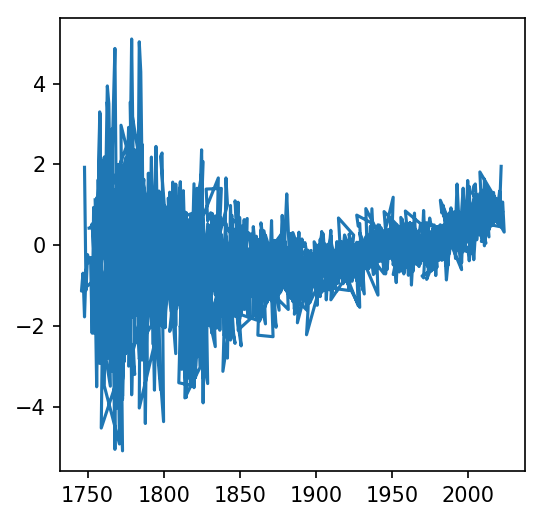

In [8]:
plt.figure(figsize=(4,4), dpi=150)

plt.plot(data['Date'], data['Anomaly'])
plt.show

In [9]:
#date_str = data['Year'].astype(str) + '-' + data['Month'].astype(str)
#date_np = np.array(pd.to_datetime(date_str, format='%Y-%m'))
date_np = np.array(data['Date'])
date_np

array([1753.91666667, 1754.91666667, 1744.91666667, ..., 2019.91666667,
       2020.91666667, 2021.91666667])

In [10]:
temp = np.array(data['Anomaly'])
temp

array([-1.131,    nan,    nan, ...,  0.671,  0.919,  1.95 ])

<function matplotlib.pyplot.show(*args, **kw)>

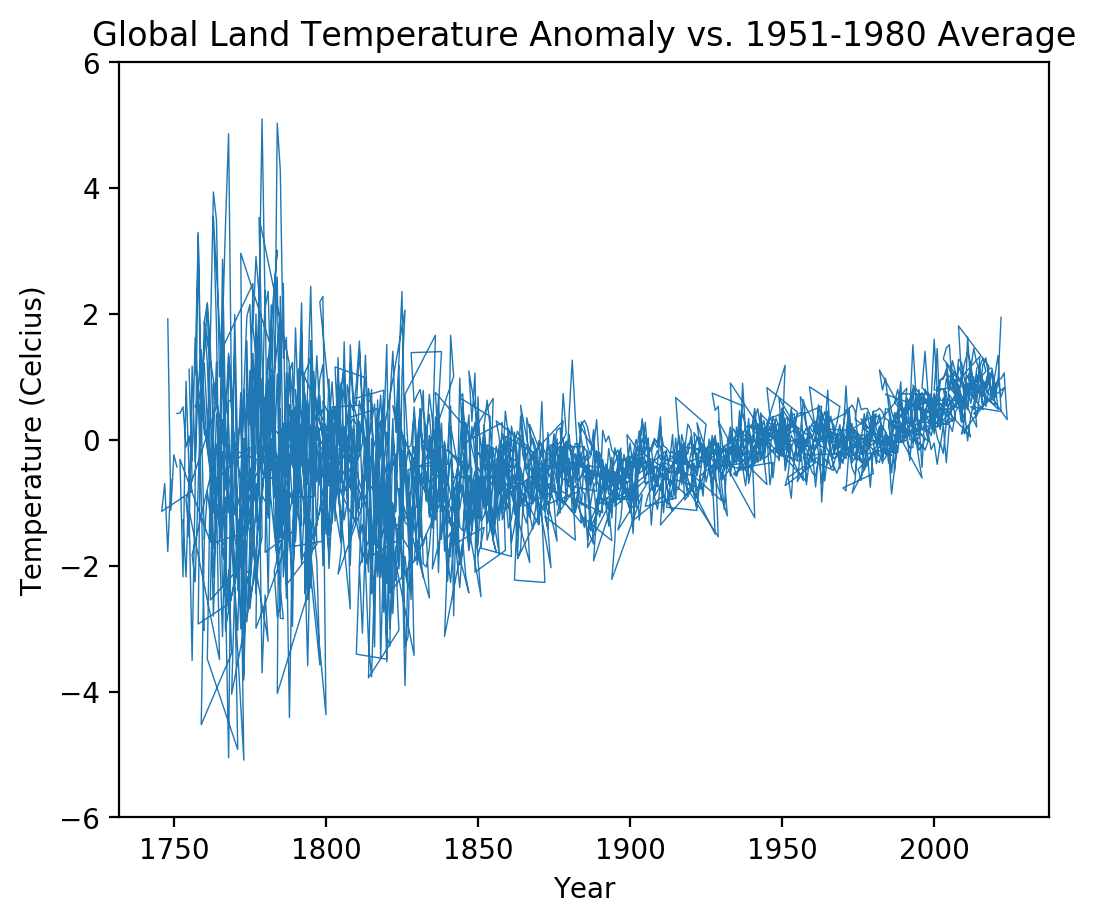

In [11]:
plt.figure(figsize=(6,5), dpi=200)

plt.plot(date_np, temp, '-', linewidth=.5)
plt.ylim(-6,6)
plt.xlabel('Year')
plt.ylabel('Temperature (Celcius)')
plt.title('Global Land Temperature Anomaly vs. 1951-1980 Average')

plt.show

In [12]:
#Going to reread everything again
data = pd.read_csv('usaTemperatureHistory.txt', delim_whitespace=True)
#data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')
data['Date'] = data['Year'] + data['Month'] - (1/12)

#1970 to 2013
data = data.loc[(data['Year'] >= 1970) & (data['Year'] <= 2013), :]

In [13]:
data

,Year,Month,Anomaly,Unc.,Anomaly.1,Unc..1,Anomaly.2,Unc..2,Anomaly.3,Unc..3,Anomaly.4,Unc..4,Date
2714,1970,1,0.112,0.084,0.143,0.024,-0.055,0.028,-0.034,0.024,-0.006,0.019,1970.916667
2715,1970,2,0.509,0.063,0.131,0.029,-0.048,0.028,-0.031,0.025,-0.007,0.018,1971.916667
2716,1970,3,-0.003,0.100,0.150,0.028,-0.050,0.027,-0.026,0.024,-0.002,0.018,1972.916667
2717,1970,4,0.160,0.104,0.140,0.031,-0.057,0.028,-0.021,0.024,0.001,0.018,1973.916667
2718,1970,5,-0.078,0.105,0.110,0.032,-0.063,0.028,-0.017,0.024,0.005,0.018,1974.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2013,5,0.813,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.916667
3235,2013,6,1.088,0.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.916667
3236,2013,7,0.671,0.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.916667
3237,2013,8,0.919,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.916667


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [14]:
# fit linear regression to 1970 to 2013
#X = data['Date'].astype(int)
X = data['Date']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, data['Anomaly'])


In [15]:
# extrapolate
y_pred = intercept + slope * X

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/karennavarro/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


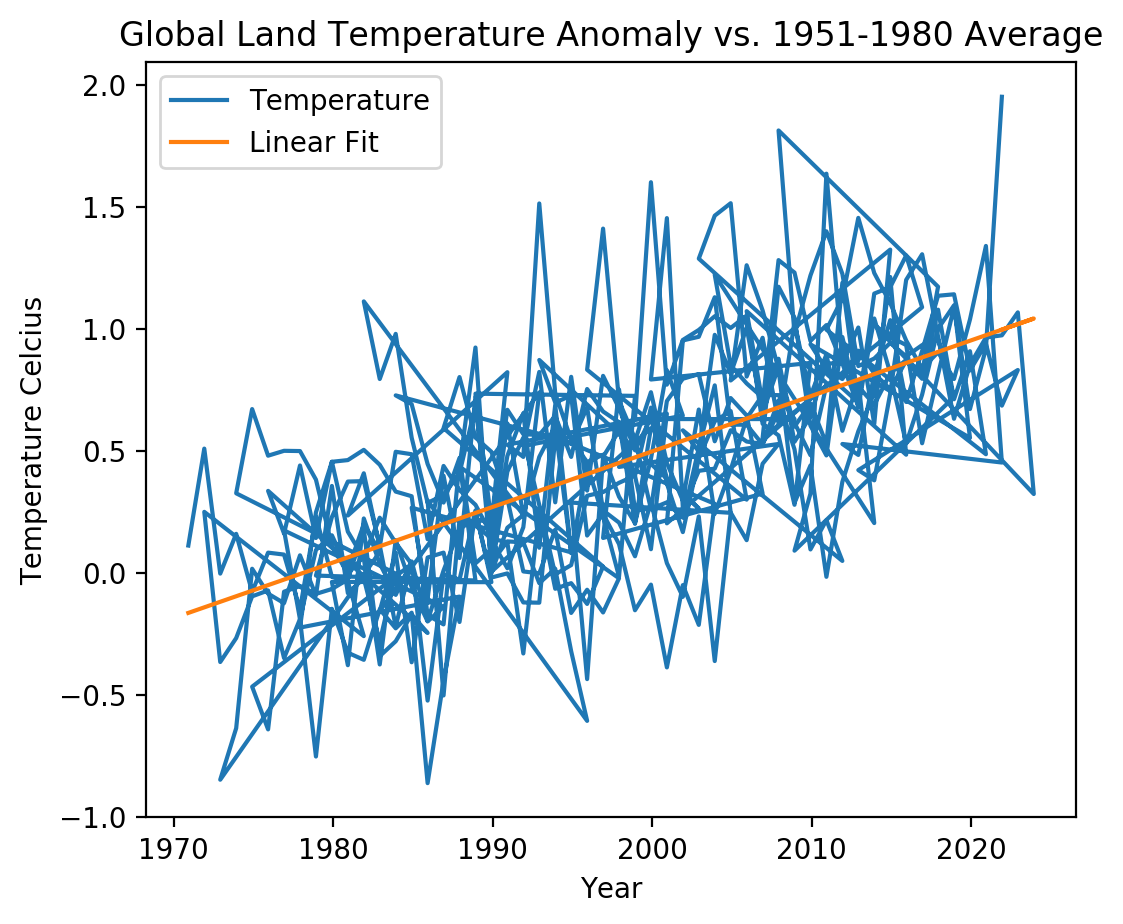

In [16]:
# Plot the data and the linear fit
#fig = plt.figure(figsize=(6,5), dpi=200)
fig, ax = plt.subplots(figsize=(6,5), dpi=200)

ax.plot(data['Date'], data['Anomaly'], label='Temperature')
ax.plot(data['Date'], y_pred, label='Linear Fit')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Celcius')
plt.title('Global Land Temperature Anomaly vs. 1951-1980 Average')
ax.legend()

plt.show()

In [17]:
# extrapolating to 2050
# time : 2050-01-01
year_2050 = 2050
#year_2050 = pd.Timestamp('2050-01-01').to_datetime64().astype(int)
temp_2050 = intercept + slope * year_2050

print(f"Predicted temperature-anomaly in 2050: {temp_2050:.4f} Celcius")


Predicted temperature-anomaly in 2050: 1.6351 Celcius


# Questions 1-13

1. What is the hypothesis here?

The hypothesis is that there is a linear increase between 1970 to 2013, that extends all the way up to 2015.

2. How would you write the hypothesis mathematically (it’s simple, don’t overthink)?

I would write it as y = mx + b, (linear)

3. What are the parameters of your model (hypothesis)?

m and b, m=slope, b= y-int

4. Now, obviously, if you have proposed a realistic model, it should not fit the data perfectly.
Rather, you would expect to see some data scatter around your best-fit model.
Therefore, we need to also propose a hypothesis for the form of scatter around this physical model.

Gaussian (noise), from 5.

5. What do you think would be a good model describe the data scatter around your deterministic model?
If you have no idea, take the simplest case, a Gaussian.
What would be the parameters of this noise model then?

From Gaussian, 2 parameters are mean and standard deviation.

Which one of them can be computed from your originally-proposed deterministic model?

Mean, because the linear fit would act as the mean.

Which one of the parameters is unknown and has to be inferred through the fitting process?

Standard deviation

6. So, now over all, how many parameters do you need to constrain for your combined (deterministic + noise model)?
m, b and standard deviation, assuming I have mean

7. Now, write the likelihood function for this dataset under your proposed combined hypothesis. The likelihood function is simply the product the probabilities of observing individual events given your deterministic and noise models (Use our lecture notes for help to define it).

the product the probabilities of observing individual events, from this( m, b, sigma)
following slide 6 in CTSI slides: 
P = (1 / (σ * sqrt(2 * π))) * exp(-(y-(m*x+b))^2/(2*σ^2))

In [96]:
#remember y= anomaly, x=date

def likelihood(y,x,m,b,sigma):
    res = y-(m*x + b)
    #log-likelihood
    log_likelihood = -0.5 * np.log(2*np.pi*sigma**2) - 0.5 * (res**2/sigma**2)
    
    return log_likelihood

8. Now, we need to maximize this function, but it is not computationally feasible. Why? What do you suggest to do with the likelihood function to make computable within the limited numerical precision of the computer?

It is not computationally feasible because we are calculating the product of probabilities. By taking many small probablities and computing its product, we lead the computer to an overflow of memory issues. 

 We take the logarithm of the likelihood function,
 
 --> log_likelihood = -0.5 * np.log(2*np.pi*sigma**2) - 0.5 * (res**2/sigma**2)

9. Apply the necessary transformation to get an objective function that can be readily maximized by a computer.


In [118]:
# def likelihood(y,x,m,b,sigma):
#     res = y - (m * x + b)
#     #log-likelihood
#     log_likelihood = -0.5 * np.log(2*np.pi*sigma**2) - 0.5 * (res**2/sigma**2)
    
#     return log_likelihood

from scipy.optimize import minimize

# I get slightly different answers: keeping the following
#x = data['Date'].astype(int)
x = data['Date']
#y = data['Anomaly'].astype(int)
y = data['Anomaly']


def likelihood(parameters,y,x):
    m, b, sigma = parameters
    y_pred = m*x + b
    res = y - y_pred
    likelihood = np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - 0.5 * (res / sigma)**2)
    
    return -likelihood

likelihood_func = lambda params: likelihood(params, y, x)

In [119]:
x

2714    1970.916667
2715    1971.916667
2716    1972.916667
2717    1973.916667
2718    1974.916667
           ...     
3234    2017.916667
3235    2018.916667
3236    2019.916667
3237    2020.916667
3238    2021.916667
Name: Date, Length: 525, dtype: float64

In [120]:
y

2714    0.112
2715    0.509
2716   -0.003
2717    0.160
2718   -0.078
        ...  
3234    0.813
3235    1.088
3236    0.671
3237    0.919
3238    1.950
Name: Anomaly, Length: 525, dtype: float64

10. Now, use the optimizer algorithm of your language of choice to find the parameter sets that maximize the likelihood of observing your data given the model (In Python, You can use SciPy’s minimize() function). 

In [121]:
# for m,b,sigma, initial guess
parameters_i = [1.0, 0.0, 0.5]

# using SciPy's minimize
result = minimize(likelihood_func, parameters_i)

In [122]:
#values to get
parameters_2 = result.x
parameters_2

array([ 2.26490776e-02, -4.48009968e+01,  1.14655434e+00])

11. Now, repeat the same process for a different hypothesis: The temperature anomaly is flat from the year 1970 to 2013. That is surely a bad hypothesis, but regardless, let’s form a mathematical model corresponding to this hypothesis and see how it looks like.

In this case itll be flat for the likelihood

In [141]:
parameters_i = [0, 0, 0]

def flat_likelihood(parameters, y):
    m, b, sigma = parameters
    constant = parameters_i[0]
    res = y - constant
    
    #likelihood = np.sum(-0.5 * np.log(2 * np.pi) - 0.5 * (res)**2)
    likelihood = np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - 0.5 * (res / sigma)**2)
    
    return likelihood 


In [143]:
parameters_i_flat = [0,0,0]

likelihood_func_flat = lambda params: flat_likelihood(params, y)

result_flat = minimize(likelihood_func_flat, parameters_i_flat)


optimal_parameters_flat = result_flat.x
optimal_parameters_flat

/Users/karennavarro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([0.00000000e+00, 0.00000000e+00, 7.30107906e-08])

12. Now, use the BIC model selection criterion (from our lecture notes) to compare the performance of the two hypotheses for our data (one is temperature increase over time, the other is constant temperature (no global warming)).Which one fits the data better?

From notes in Bayes rule: BIC = -2 * log-likelihood + p * log(n)

In [146]:
def likelihood(parameters, y, x):
    m, b, sigma = parameters
    y_pred = m * x + b
    res = y - y_pred
    likelihood = np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - 0.5 * (res / sigma)**2)
    
    return likelihood

#no sigma in likelihood
def flat_likelihood(parameters, y):
    m, b, sigma = parameters
    constant = parameters[0]
    res = y - constant
    #likelihood = np.sum(-0.5 * np.log(2 * np.pi) - 0.5 * (res)**2)
    likelihood = np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - 0.5 * (res / sigma)**2)
    
    return likelihood


In [147]:
n = len(y)

# from above paremeters are 
# increase = parameters_2
# flat = optimal_parameters_flat

likelihood_max = likelihood(parameters_2, y, x)
flat_likelihood_max = flat_likelihood(optimal_parameters_flat, y)

# I need this to make sure the len is correct if not I get an error
p_increase = len(parameters_2)
p_flat = len(optimal_parameters_flat)

In [148]:
# BIC for each model
bic_increase = -2 * likelihood_max + p_increase * np.log(n)
bic_flat = -2 * flat_likelihood_max + p_flat * np.log(n)

print("BIC - increase:", bic_increase)
print("BIC - flat:", bic_flat)

BIC - increase: 1173.9608631456458
BIC - flat: 3.986398804278702e+16


13. What does each model predict for the temperature of Earth in 2050?

In [149]:
year_2050 = 2050
y_pred_increase = parameters_2[0] * year_2050 + parameters_2[1]
print("Pred 2050 (Increase model):", y_pred_increase)

y_pred_flat = optimal_parameters_flat[0]
print("Pred 2050 (Flat model):", y_pred_flat)


Pred 2050 (Increase model): 1.629612364304485
Pred 2050 (Flat model): 0.0


In the increase model: 1.629612364304485

In this method I get something similar to --> extrapolate: y_pred = intercept + slope * X, = 1.6351C above. The difference is not great but relatively similar.

This is still below the answer of 1.9158. 
This tells me my likelihood function is underpredicting. 

I have checked and Im not entirely sure why I am underpredicting if im explicitly calling all values from 1970-2013. 